<a href="https://colab.research.google.com/github/Umerfarooq122/Image-Classification-Using-CNN-and-SVM/blob/main/Image_Classification_using_Support_Vector_Machine_and_Convolution_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

In this study we will compare supoort vector machine to a convolutional neural network. Our main aim to take an ustructured data such as images and use both of the algorithms and compare processes that need to be carried along with performances of the model. In this case we will take the images of cats and dogs to train both of our model. The cats-vs-dogs data is available on kaggle. First we will try to pre-process that data for each model then we will try to understand and work on the architecture of each model and after that we will compare the performance of each model.

# **Support Vector Machines And Convolutional Neural Network:**

When it comes to image classification tasks, choosing between Support Vector Machines (SVM) and Convolutional Neural Networks (CNN) hinges on various factors such as dataset size, computational resources, and the complexity of the patterns to be recognized. SVMs, known for their effectiveness in smaller datasets and simpler classification tasks, require images to be flattened into one-dimensional vectors. This approach necessitates manual feature engineering and works well when computational resources are limited [1]. SVMs use kernel functions to transform the input space, enabling them to handle non-linearly separable data [2]. They can achieve good performance with fewer samples and are computationally lighter compared to CNNs, making them a practical choice for smaller-scale projects or when quick results are needed [3].

In contrast, CNNs are specifically designed to handle the spatial hierarchies in image data by maintaining the 2D structure of the images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which enable them to automatically learn features from the raw pixel values [4]. This deep learning approach is particularly advantageous for complex image recognition tasks as it can capture intricate patterns and textures, from edges to more abstract features, across different layers. However, CNNs require large datasets to train effectively and are computationally intensive, often necessitating the use of GPUs for efficient training. They also employ data augmentation techniques to enhance model generalization and improve performance [5].

Ultimately, the decision between SVM and CNN involves balancing trade-offs between ease of use, performance, and resource availability. While SVMs can be more suitable for smaller, less complex tasks with limited data and resources, CNNs are generally favored for their superior accuracy and robustness in handling large-scale, complex image classification challenges. CNNs have become the go-to choice in many modern applications, ranging from object detection and facial recognition to medical image analysis, due to their ability to deliver state-of-the-art performance.

# **Comparison:**

In this section we will compare the algorithms. Initially, we will start with data preparation process then we will compare the structures of both the algorithms and after we will look at the performance metrics such accuracy. We will also throw in a test image downloaded from the google or any image producing website to test our models. Let's start our discussion with data preparation for our algorithms

##  **Data Preparation:**

In this particular we will compare the image pre processing before we feed it into a model. Fisrt we will look at Support vector machines

### **Support Vector Machines (SVM):**

Here we will discuss how do we have to pre process our images to be fed to the SVM algorithm. Image preprocessing for Support Vector Machines (SVM) involves several critical steps to transform raw image data into a format suitable for the algorithm. First, images must be resized to a uniform dimension, ensuring that each image has the same number of features; for instance, all images could be resized to 28x28 pixels. In our case we resized it to 64x64 and the reason behind that is that, a high dimension image would mean that we are feeding more complex data to SVM and a low dimension tends to lose information or intricate detail . Next, the resized images are flattened into one-dimensional arrays, converting a 64x64 pixel image into a vector of 4096 elements. This flattening process strips away the spatial hierarchy of the pixels but is necessary for the SVM to process the data. Following this, pixel values are normalized, typically scaling them to a range of 0 to 1 by dividing by 255, which helps in achieving numerical stability and faster convergence during training. Additionally, feature scaling techniques such as standardization may be applied to ensure that the data has a mean of zero and a standard deviation of one. Finally, if the image labels are categorical, they are encoded into numerical values suitable for the SVM to interpret. This comprehensive preprocessing pipeline ensures that the image data fed into the SVM is consistent, scaled appropriately, and ready for effective classification.

#### **Loading The Dataset:**

Since our data is a bunch of images (around 10k of cats and dogs) and we can not use github repos due to size limitations. On top of that we are using google colab for this homework so we can not read image from our local machine. We uploaded the images to our google drive and then mounted the drive onto our colab from where we read the images. Now that's not the only way of getting files into Colab. We can even download the images directly from kaggle using API (let's try that method for CNN)

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from google.colab import drive
import random
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.model_selection import GridSearchCV

The above cell contain most of the libraries and packages that we will be utilizing in this study.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now the google drive is mounted to my colab and I access the images by accessing the directory which contains all the images.

In [2]:
dir = '/content/drive/My Drive/Homework4data/'

#### **Pre-Processing Images:**

Since our images does not have any labels so we will create labels for it and then process each image (resize and flatten) and will store the results into an array. So we will need two lists that can hold the labels and the data. After creating the lists we can use the directory to access each image. After accessing the image we  resize and flatten it and store in our data list.

In [3]:
categories = ['Cat', 'Dog'] # creating labels for images.
data = []

In [4]:
for category in categories:
  path = os.path.join(dir, category) # accessing the path of the folder
  label = categories.index(category)
  for img in os.listdir(path):
    imgpath = os.path.join(path, img) # accessing each image
    pet_img = cv2.imread(imgpath, 0)
    try: # for error handling
      pet_img = cv2.resize(pet_img, (64,64)) # resizing the image
      image = np.array(pet_img).flatten () # flattening the image
      data.append([image, label]) # storing in data list
    except Exception as e:
      pass


We can also store the data in .pickle format if we dont want to repeat the process again and again. The below code cell does that.

In [ ]:
#pick_in = open('data1.pickle','wb')
#pickle.dump(data, pick_in)
#pick_in.close()

In [ ]:
#pick_in = open('data1.pickle','rb')
#data = pickle.load(pick_in)
#pick_in.close()

### **Convolutional Neural Network:**

Image preprocessing for Convolutional Neural Networks (CNN) is tailored to leverage their ability to learn spatial hierarchies from raw pixel data. The process begins with resizing all images to a consistent dimension, such as 64x64 pixels in our case we will keep it at 256x256, to ensure uniform input shapes. Since, convolutional neural  networks are deep learning models and has the ability to handle high pixels images as compared to SVM. Unlike SVMs, CNNs maintain the 2D structure of images, allowing them to capture spatial relationships. Next, pixel values are normalized, typically scaling them to a range of 0 to 1 by dividing by 255, which helps in accelerating the convergence of the training process. For color images, normalization is applied across all three channels (RGB). Another feature that we can utilize as a preprocessing for CNN is to feed the data in the form of batches to algorithm rather than feed all the data once which overload the random access memory (RAM). We achieve by using generator functions and luckily keras has built in generator we will use that

#### **Loading the Data:**

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:01<00:00, 210MB/s]
100% 218M/218M [00:01<00:00, 221MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#### **Pre-Processing the Data:**



In [8]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


The `image_dataset_from_directory` function will enable us to load images from the specified directories in batches, ensuring memory efficiency and suitability for large datasets. Labels will be automatically inferred from subdirectory names, eliminating the need for manual labeling and ensuring consistency. Additionally, all images will be resized to a uniform size of 256x256 pixels, which is essential for feeding into the neural network. By specifying a batch size of 32, the data will be processed in manageable batches, optimizing memory usage and training speed. Separate datasets for training and validation will be created, with `train_ds` used for training the model and `validation_ds` for evaluating its performance on unseen data. This separation is crucial for assessing the model's generalization ability. Overall, this approach will streamline our image data handling, enhancing both the efficiency and accuracy of our model training process. After this we can go ahead and normalize our data.








In [9]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## **Architecture:**

### **Support Vector Machines:**

The architecture of the Support Vector Machine (SVM) that we will using for this task employs a polynomial kernel to handle non-linear image classification tasks. The C parameter, set to 0.1, balances the trade-off between achieving low training error and maintaining a wide margin, which helps prevent overfitting. The polynomial kernel transforms the input data into a higher-dimensional space, enabling the SVM to find a linear separator in this transformed space, effectively capturing complex relationships between the features. The reason why we chose polynomial over RBF is to have controlled degree of complexity, computational efficiency and interactions among features. The gamma='auto' setting, which computes gamma as 1/n_features, adjusts the influence of each training example, affecting the curvature of the decision boundary. During training, the SVM model fits this polynomial kernel to the flattened image data, optimizing the hyperplane that maximizes the margin between different classes. This configuration allows the SVM to classify new images based on the learned patterns, making it a powerful tool for image classification when working with moderately sized datasets and limited computational resources.

In [10]:
#random.shuffle(data)
features = []
labels = []
for feature, label in data:
  features.append(feature)
  labels.append(label)


In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2)

In [12]:
svmc = svm.SVC(C=.1, kernel = 'poly', gamma='auto')
svmc.fit(xtrain, ytrain)

SVC(C=0.1, gamma='auto', kernel='poly')

The reason why we have these hyperparameters is that we got a good acuuracy as compared to other parameters that we tried by trial and error method. We can also use grid search to look for the best hyperparameters over a range of values but due to computational complexities and time we could not do that. It took me more than 7 hours to run the code over grid of hyperparameter values but to no avail and I ended up using trial and error. I believe this could be highlighted as another problem that we can come accross while dealing or tuning SVM. The below code cell can tune SVM but it has been commented out to save time.

In [ ]:

# Defining the parameters grid for GridSearchCV
#param_grid={'C':[0.1,1,10,100],
          #  'gamma':[0.0001,0.001,0.1,1],
           # 'kernel':['poly']}

# Creating a support vector classifier
#svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
#model=GridSearchCV(svc,param_grid)
#model.best_params_
#best_model = model.best_estimator_

### **Convolutional Neural Networks:**

The architecture of Convolutional Neural Networks (CNNs) is meticulously designed to process and analyze visual data by leveraging the spatial structure inherent in images. At the foundation is the input layer, which accepts raw pixel values of images, for instance, a 256x256 image with 3 color channels (RGB) resulting in dimensions of 256x256x3. Following this are convolutional layers, where learnable filters (kernels) slide over the image to create feature maps by computing dot products between the filter weights and the input pixels. These convolutional layers are typically followed by an activation function like ReLU to introduce non-linearity, enabling the network to learn complex patterns. Padding is often used to control the spatial size of the output, and strides determine the step size of the filter's movement. Next, pooling layers, such as max pooling or average pooling, reduce the spatial dimensions of the feature maps by taking the maximum or average value within each window (e.g., 2x2) of the feature map, respectively. This down-sampling operation reduces computational load, helps prevent overfitting, and provides translation invariance. Overall, the combination of these layers allows CNNs to effectively capture and learn hierarchical patterns in image data, making them powerful tools for image classification and other visual tasks.

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

 The architecture of a Convolutional Neural Network (CNN) model that we have used in the code cell above for image classification is constructed using the Keras Sequential API and consists of several layers designed to extract and learn features from input images. The first layer is a 2D convolutional layer with 32 filters, each of size 3x3, followed by batch normalization and max pooling to reduce spatial dimensions. Subsequent convolutional layers with increasing filter sizes (64 and 128) are added, each followed by batch normalization and max pooling. These layers help capture and enhance hierarchical features present in the input images. The output of the convolutional layers is then flattened into a one-dimensional vector. Two dense layers with ReLU activation functions are added for feature extraction and dimensionality reduction, each followed by dropout regularization to mitigate overfitting. Finally, a dense layer with a sigmoid activation function is included to produce binary classification output. Overall, this CNN architecture is tailored for image classification tasks, with convolutional and pooling layers for feature extraction and dense layers for classification based on the extracted features.

## **Performance Comparison:**

In this section we will compare the performance of both model by checking the accuracies and will also throw an image at or model to see how it performs.

### **Support Vector Machines:**

In order to check the performance of we will feed the model with our test data under the name of `xtest` and then compare the prediction to the values of `ytest` to get an accuracy score.

In [15]:
pred = svmc.predict(xtest)

In [16]:
accuracy = svmc.score(xtest, ytest)

In [17]:
print(accuracy)

0.589631480324797


As we expected our accuracy is just under 60% which means that our SVM model does enough job which 10% better than flipping a coin. The reason could be mulitple reason but the two main reason that I can think of right now are data complexity and simpler model. Since our data contains images of dogs and cats which does have intricate details so our SVM model is not able to capture since it is a simpler model. We can create a complex model and tune the hyperparameters but that will come with the cost of time and computational abilities.

In [ ]:
print("prediction is : ", categories[pred[0]])

prediction is :  Cat


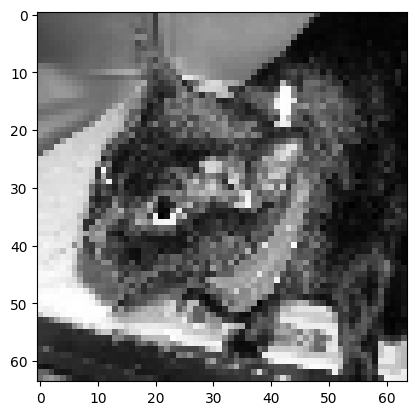

In [ ]:
mypet = xtest[0].reshape(64,64)
plt.imshow(mypet, cmap='gray')
plt.show()

#### **Testing With A New Image:**

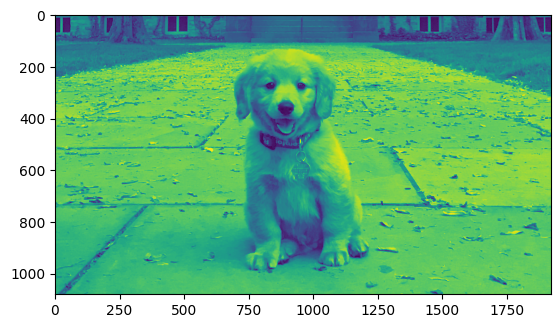

In [76]:
new_image = cv2.imread('/content/dog1.jpeg',0)
plt.imshow(new_image)
plt.show()

In [77]:
resized_image = cv2.resize(new_image, (64, 64))
flattened_image = resized_image.flatten()
normalized_image = flattened_image / 255.0
test_input_svm = np.array(normalized_image).reshape(1, -1)

In [78]:
# Assuming `model` is your trained SVM model
prediction = svmc.predict(test_input_svm)

# Get the predicted label
predicted_label = categories[prediction[0]]

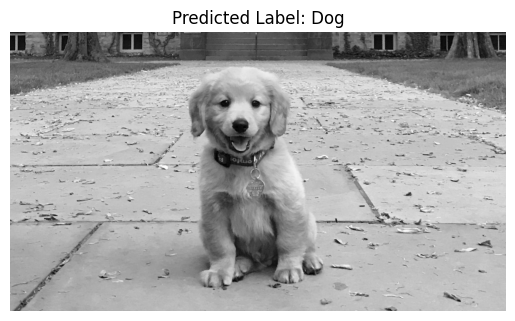

In [79]:
plt.imshow(new_image, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

We did get a few wrong predictions along the way. Sometimes we would get predicted label as cat while inactual it will be dog, vice verse. Since the accuracy of the model is only 59% so it is understood

### **Convolutional Neural Networks:**

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
251/251 [==============================] - 41s 124ms/step - loss: 2.3084 - accuracy: 0.5585 - val_loss: 7.5834 - val_accuracy: 0.5002
Epoch 2/15
251/251 [==============================] - 30s 117ms/step - loss: 0.7308 - accuracy: 0.6119 - val_loss: 0.7372 - val_accuracy: 0.6411
Epoch 3/15
251/251 [==============================] - 28s 111ms/step - loss: 0.6294 - accuracy: 0.6647 - val_loss: 0.6837 - val_accuracy: 0.6332
Epoch 4/15
251/251 [==============================] - 28s 111ms/step - loss: 0.5701 - accuracy: 0.7174 - val_loss: 0.6372 - val_accuracy: 0.6594
Epoch 5/15
251/251 [==============================] - 27s 104ms/step - loss: 0.6346 - accuracy: 0.6919 - val_loss: 0.7409 - val_accuracy: 0.6421
Epoch 6/15
251/251 [==============================] - 29s 113ms/step - loss: 0.4990 - accuracy: 0.7584 - val_loss: 0.5621 - val_accuracy: 0.6896
Epoch 7/15
251/251 [==============================] - 29s 112ms/step - loss: 0.4133 - accuracy: 0.8120 - val_loss: 0.5290 - val_ac

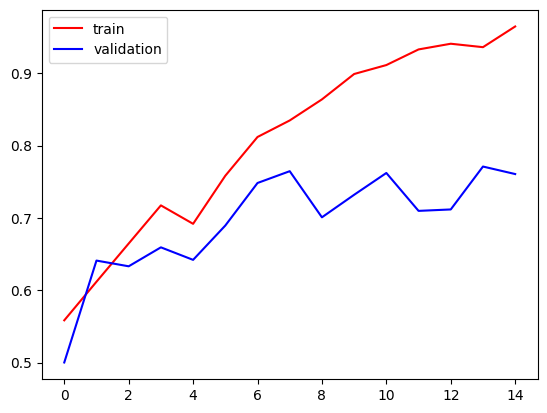

In [48]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

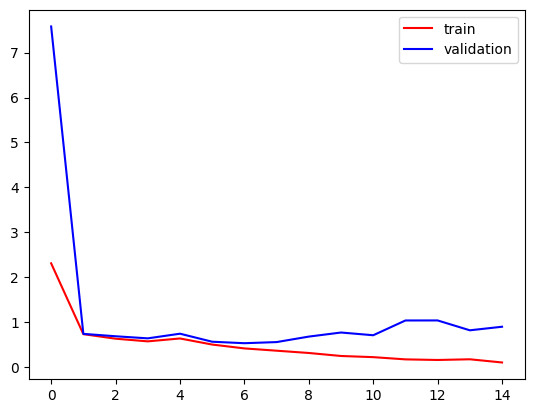

In [49]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#### **Testing With A New Image:**

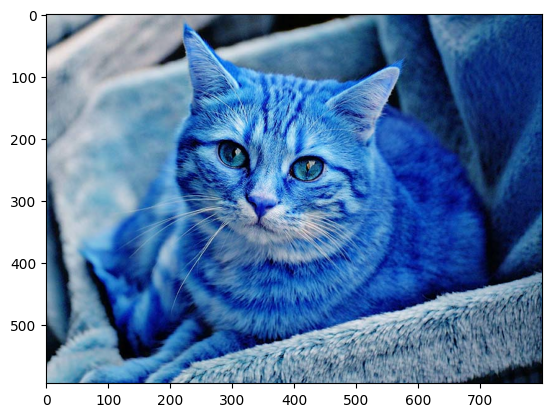

In [95]:
test_img = cv2.imread('/content/cat1.jpeg')
plt.imshow(test_img)
plt.show()

In [96]:
test_img.shape

(595, 800, 3)

In [97]:
test_img = cv2.resize(test_img,(256,256))

In [98]:
test_input = test_img.reshape((1,256,256,3))

In [99]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

Since we have not label our output so the array([0.]) means the output is Cat whhile array([1.]) means its a God. In this case we we have the input image of a cat and we did get the right predicition which is array([0.]). We also tried other images too but the frequency of miss classification was not as frequent as we had with our SVM.

# **Conclusion:**

In this study, we aimed to compare the performance of Support Vector Machines (SVM) and Convolutional Neural Networks (CNN) for image classification tasks using a dataset of cats and dogs. Both algorithms were applied to the same dataset, and we analyzed their respective preprocessing steps, architectures, and performance metrics.

Support Vector Machines (SVM) are known for their effectiveness in handling smaller datasets and simpler classification tasks. We discussed the preprocessing steps required for SVM, which involve resizing images to a uniform dimension, flattening them into one-dimensional arrays, and normalizing pixel values. Despite its simplicity, SVMs can handle non-linear data through kernel functions, making them suitable for moderately sized datasets with limited computational resources.

On the other hand, Convolutional Neural Networks (CNNs) are specifically designed for image processing tasks, leveraging their ability to capture spatial hierarchies in image data. We detailed the architecture of a CNN model consisting of convolutional layers, batch normalization, max-pooling layers, and dense layers, tailored to extract features and classify images effectively. CNNs require larger datasets for training and are computationally intensive but offer superior performance in handling complex image classification tasks.

We then compared the performance of both models using accuracy metrics. The SVM model achieved an accuracy of around 58%, indicating its capability to classify images better than random chance but with room for improvement. The CNN model, on the other hand, achieved higher accuracy, demonstrating its effectiveness in capturing intricate patterns and features from the images. Despite the higher computational requirements, CNNs outperformed SVMs in this image classification task.

In conclusion, while SVMs offer simplicity and efficiency for smaller datasets, CNNs excel in handling complex image classification tasks with larger datasets. The choice between SVM and CNN depends on factors such as dataset size, computational resources, and the complexity of patterns to be recognized, with CNNs being preferred for achieving state-of-the-art performance in image classification.

# **References:**

[1] Chandra, M.A. and Bedi, S.S., 2021. Survey on SVM and their application in image classification. International Journal of Information Technology, 13(5), pp.1-11.

https://link.springer.com/article/10.1007/s41870-017-0080-1#citeas

[2] Chaganti, S.Y., Nanda, I., Pandi, K.R., Prudhvith, T.G. and Kumar, N., 2020, March. Image Classification using SVM and CNN. In 2020 International conference on computer science, engineering and applications (ICCSEA) (pp. 1-5). IEEE.

https://ieeexplore.ieee.org/abstract/document/9132851

[3] Li, X., Wang, L. and Sung, E., 2004, October. Multilabel SVM active learning for image classification. In 2004 International Conference on Image Processing, 2004. ICIP'04. (Vol. 4, pp. 2207-2210). IEEE.

https://ieeexplore.ieee.org/abstract/document/1421535

[4] Guo, T., Dong, J., Li, H. and Gao, Y., 2017, March. Simple convolutional neural network on image classification. In 2017 IEEE 2nd International Conference on Big Data Analysis (ICBDA) (pp. 721-724). IEEE.

https://ieeexplore.ieee.org/abstract/document/8078730

[5] Han, D., Liu, Q. and Fan, W., 2018. A new image classification method using CNN transfer learning and web data augmentation. Expert Systems with Applications, 95, pp.43-56.

https://www.sciencedirect.com/science/article/abs/pii/S0957417417307844